# SDLAB ASSIGNMENT 7 on California Housing Prices Dataset

## BY
### Vaibhav Jaiswal
### PRN : 17070122071
### CS-3
### Final Year CSE, 2017-2021
# 

# PROBLEM STATEMENT
## Develop R-Script with the help of RStudio to perform various operations like data preprocessing, exploratory analysis, visualization.

# 
# Objectives
## To  understand  data  preprocessing,exploratory  analysis,visualization  of  a given dataset using R.

# 
# OUTCOMES 
## Identify  the  number  and  types  of  features  in  given  dataset. Compute  and display summary statistics for each feature available in the dataset. Create different plots such asboxplot, scatter plot, density plot for each feature in the dataset. Compare distribution and identify outliers.
# 


# Installing and Loading Packages

In [ ]:
packages <- c("readr", "ggplot2", "knitr", "tidyverse", "caret", "leaps", "car","mice","scales","RColorBrewer","plotly","nortest","lmtest","mapproj", "maps","ggmap","Cairo","GGally")

install.packages(setdiff(packages, rownames(installed.packages())))  

In [1]:
library(tidyverse)
library(plotly)
library(GGally)
library(scales)
library(readr)
library(ggplot2)
library(knitr)
library(caret)
library(leaps)
library(car)
library(mice)
library(RColorBrewer)
library(nortest)
library(lmtest)
library(ggmap)
library(mapproj)
library(grid)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.2
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: lattice

Atta

## Reading and Exploring Dataset


In [2]:
# Reading the Dataset
data_housing <- read_csv("housing.csv")


Parsed with column specification:
cols(
  longitude = col_double(),
  latitude = col_double(),
  housing_median_age = col_double(),
  total_rooms = col_double(),
  total_bedrooms = col_double(),
  population = col_double(),
  households = col_double(),
  median_income = col_double(),
  median_house_value = col_double(),
  ocean_proximity = col_character()
)


In [3]:
# Lets check the dataset 
data_housing[1:5,]

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [4]:
# Lets see a summary of the dataset 

summary(data_housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
 NA's   :5                                                          
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

# Data Cleaning and Pre processing

## Firstly lets change the categorial variable from text to Factor

In [5]:
data_housing$ocean_proximity = as.factor(data_housing$ocean_proximity)
levels(data_housing$ocean_proximity)

[1] "<1H OCEAN"  "INLAND"     "ISLAND"     "NEAR BAY"   "NEAR OCEAN"

## lets take a deeper look into ocean proximity 

In [6]:
summary(data_housing$ocean_proximity)

<1H OCEAN     INLAND     ISLAND   NEAR BAY NEAR OCEAN 
      9136       6551          5       2290       2658

## since island only has 5 rows , we can drop it 

In [7]:
data_housing = data_housing[data_housing$ocean_proximity != "ISLAND", ]

## Handle Missing Data

In [8]:
i <- 1
for(column in names(data_housing)){
    print(paste(column,"----> ",sum(is.na(data_housing[,i]))))
    i <- i+1 
}

[1] "longitude ---->  5"
[1] "latitude ---->  0"
[1] "housing_median_age ---->  0"
[1] "total_rooms ---->  0"
[1] "total_bedrooms ---->  207"
[1] "population ---->  0"
[1] "households ---->  0"
[1] "median_income ---->  0"
[1] "median_house_value ---->  0"
[1] "ocean_proximity ---->  0"


### As you can see total bedrooms has missing values 

In [9]:
total_bedrooms = data_housing$total_bedrooms
sum(is.na(total_bedrooms))

[1] 207

There are 207 observations with missing data for total_bedrooms. One thing we can do to solve this issue of NA values in total_bedrooms is to impute data points. 
Lets take a look at distribution to see which imputation works best 

Warning message:
“Removed 207 rows containing non-finite values (stat_bin).”

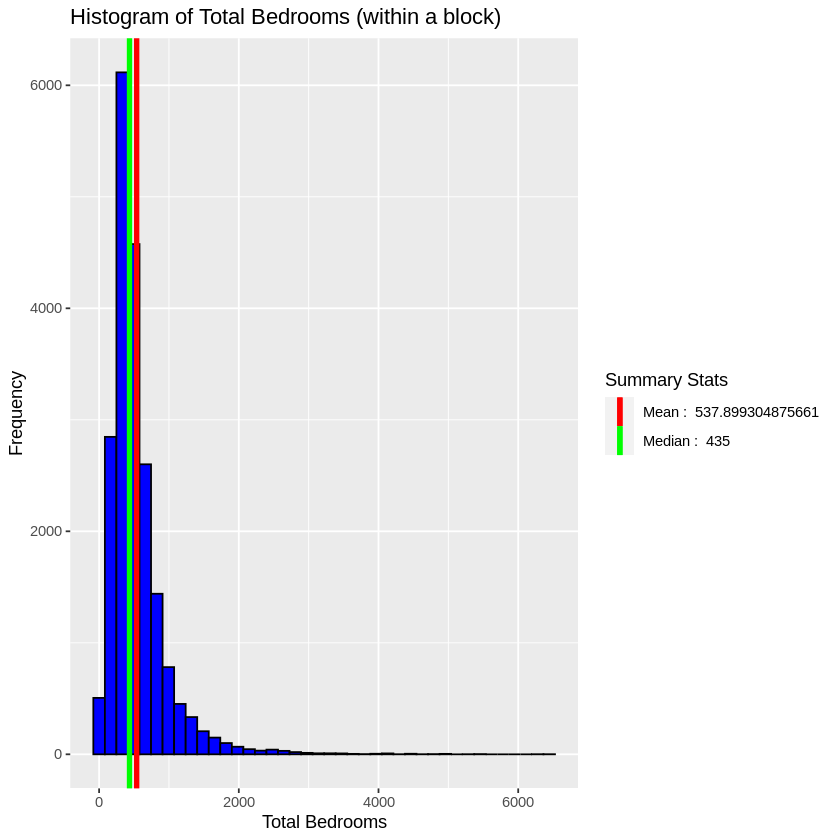

In [10]:
bedroom_mean = mean(data_housing$total_bedrooms, na.rm=TRUE)
bedroom_median = median(data_housing$total_bedrooms, na.rm=TRUE)
ggplot(data_housing, aes(x = total_bedrooms)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = bedroom_mean, color = "Mean"), lwd = 1.5) +
  geom_vline(aes(xintercept = bedroom_median, color = "Median"), lwd = 1.5) +
  xlab("Total Bedrooms") +
  ylab("Frequency") +
  ggtitle("Histogram of Total Bedrooms (within a block) ") +
  scale_color_manual(name = "Summary Stats", labels = c(paste("Mean : ",bedroom_mean), paste("Median : ",bedroom_median)), values = c("red", "green"))

## According to the above plot lets go with median imputation

In [11]:
data_housing$total_bedrooms[is.na(data_housing$total_bedrooms)] = bedroom_median

# Univariate Analysis

In [12]:
str(data_housing)

tibble[,10] [20,635 × 10] (S3: tbl_df/tbl/data.frame)
 $ longitude         : num [1:20635] -122 -122 -122 -122 -122 ...
 $ latitude          : num [1:20635] 37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num [1:20635] 41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num [1:20635] 880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num [1:20635] 129 1106 190 235 280 ...
 $ population        : num [1:20635] 322 2401 496 558 565 ...
 $ households        : num [1:20635] 126 1138 177 219 259 ...
 $ median_income     : num [1:20635] 8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num [1:20635] 452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : Factor w/ 5 levels "<1H OCEAN","INLAND",..: 4 4 4 4 4 4 4 4 4 4 ...


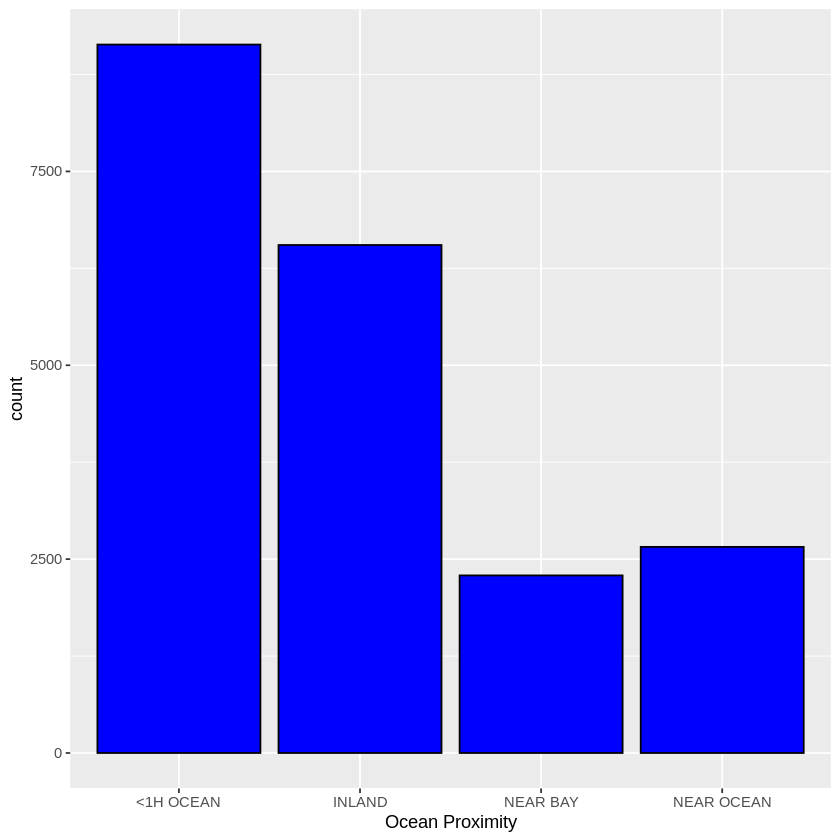

In [13]:
ggplot(data_housing, aes(x = factor(ocean_proximity))) +
    geom_bar(stat = "count", color = "black", fill = "blue") +
    xlab("Ocean Proximity")

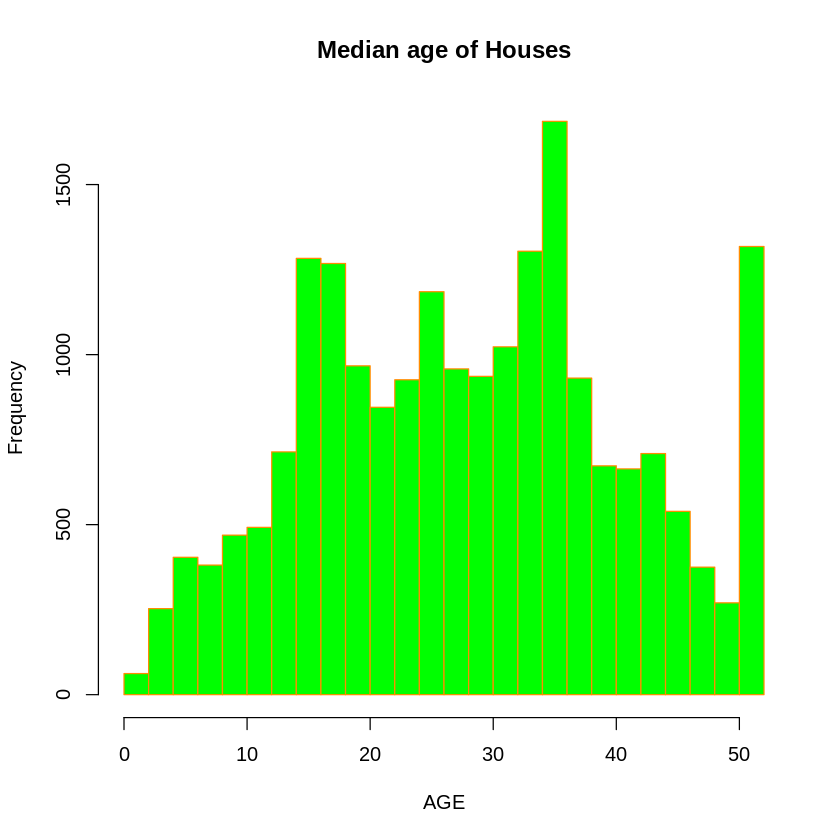

In [14]:
hist(data_housing$housing_median_age, breaks = 20, main = "Median age of Houses",xlab = "AGE", border="darkorange", col="green")


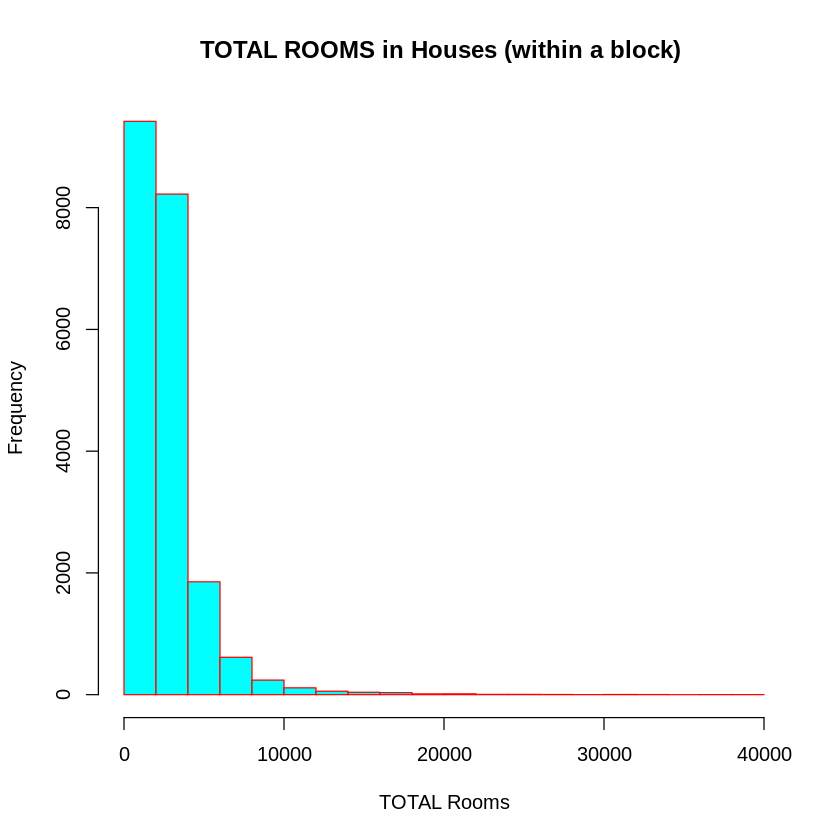

In [15]:
hist(data_housing$total_rooms, breaks = 20, main = "TOTAL ROOMS in Houses (within a block) ",xlab="TOTAL Rooms" ,border="red", col="cyan")


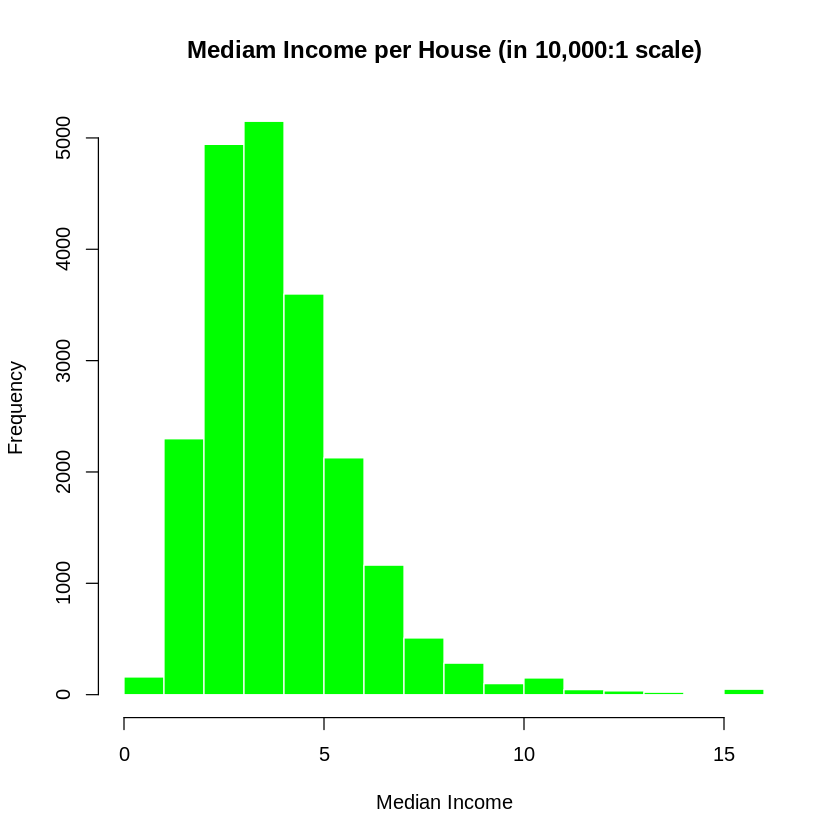

In [16]:
hist(data_housing$median_income, breaks = 20, main = "Mediam Income per House (in 10,000:1 scale)",xlab="Median Income" ,border="white", col="green")


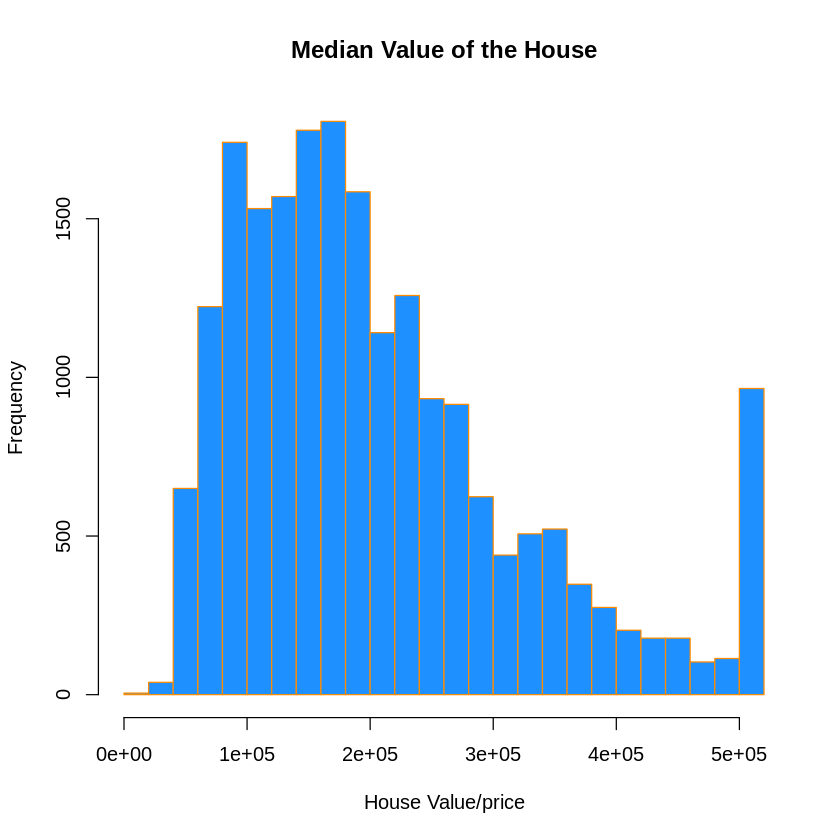

In [17]:
hist(data_housing$median_house_value, breaks = 20, main = "Median Value of the House",xlab="House Value/price", border="darkorange", col="dodgerblue")

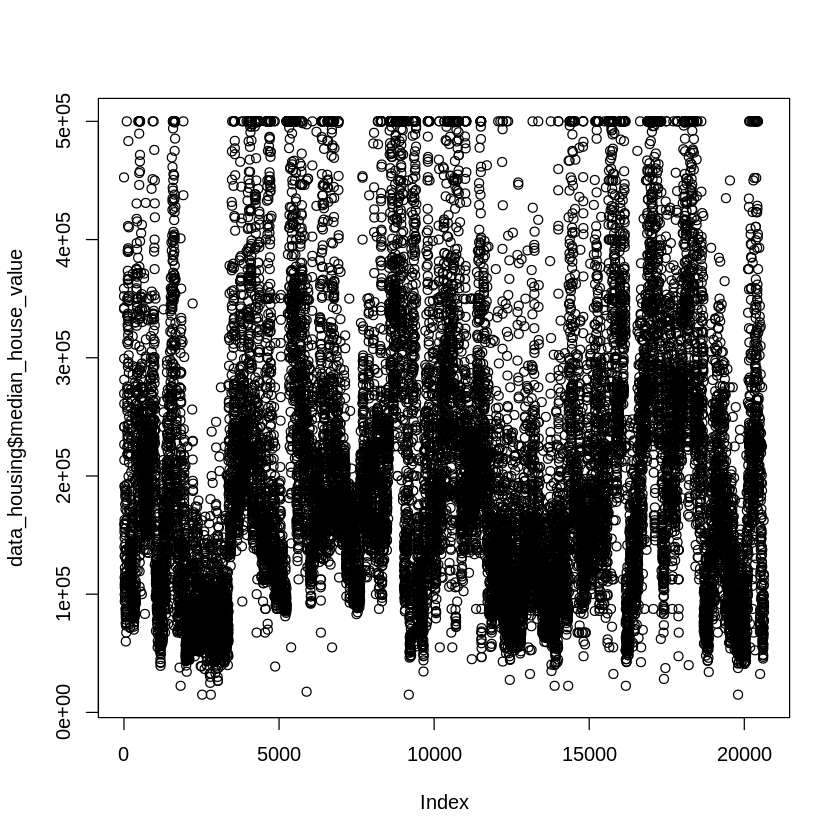

In [18]:
plot(data_housing$median_house_value)

# Bivariate Analysis and Outlier detection

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'outlier.shape' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


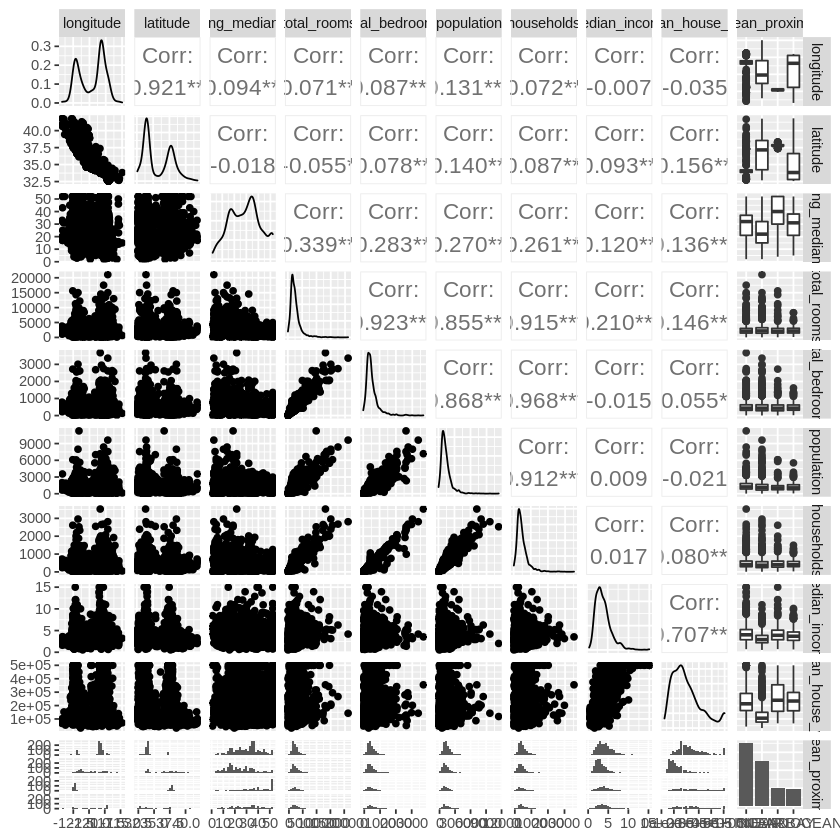

In [19]:
data_housing_sample <- data_housing[sample(1:length(data_housing$median_house_value), 2000), ]
ggpairs(data_housing_sample,outlier.shape = I('.'),upper = list(continuous = wrap("cor", size = 4.75, align_percent = 1)))

Warning message:
“Removed 5 rows containing missing values (geom_point).”

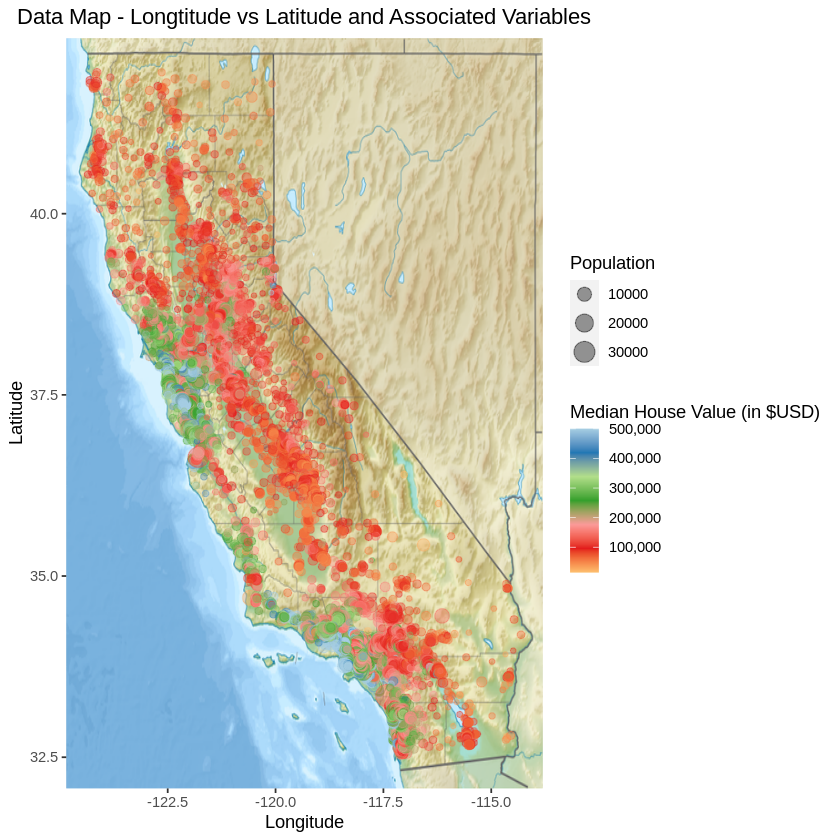

In [20]:
california_image <- png::readPNG("images/Relief_map_of_California.png")
plot_map = ggplot(data_housing, 
                  aes(x = longitude, y = latitude, color = median_house_value, 
                      hma = housing_median_age, tr = total_rooms, tb = total_bedrooms,
                      hh = households, mi = median_income)) +
              annotation_custom(rasterGrob(california_image, width = unit(1,"npc"), height = unit(1,"npc")),-Inf, Inf, -Inf, Inf)+
              geom_point(aes(size = population), alpha = 0.4) +
              xlab("Longitude") +
              ylab("Latitude") +
              ggtitle("Data Map - Longtitude vs Latitude and Associated Variables") +
              theme(plot.title = element_text(hjust = 0.5)) +
              scale_color_distiller(palette = "Paired", labels = comma) +
              labs(color = "Median House Value (in $USD)", size = "Population")
plot_map

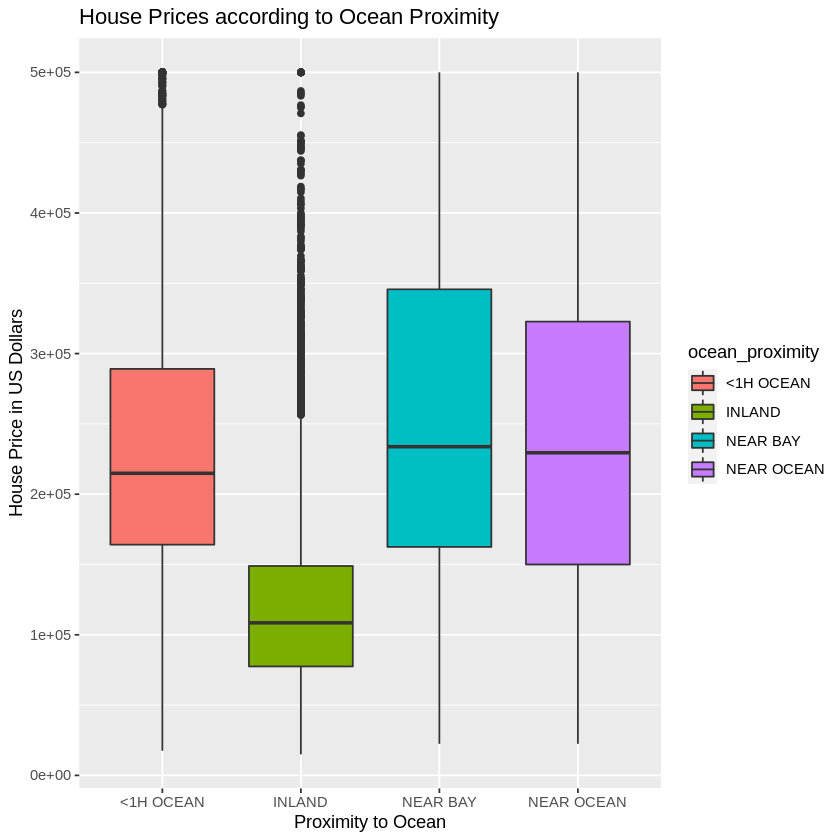

In [21]:
ggplot(data_housing, aes(factor(ocean_proximity), median_house_value, fill=ocean_proximity)) +
                    geom_boxplot() +
                    ggtitle("House Prices according to Ocean Proximity") +
                    xlab("Proximity to Ocean") +
                    ylab("House Price in US Dollars")

# Variable Transformation and Creation

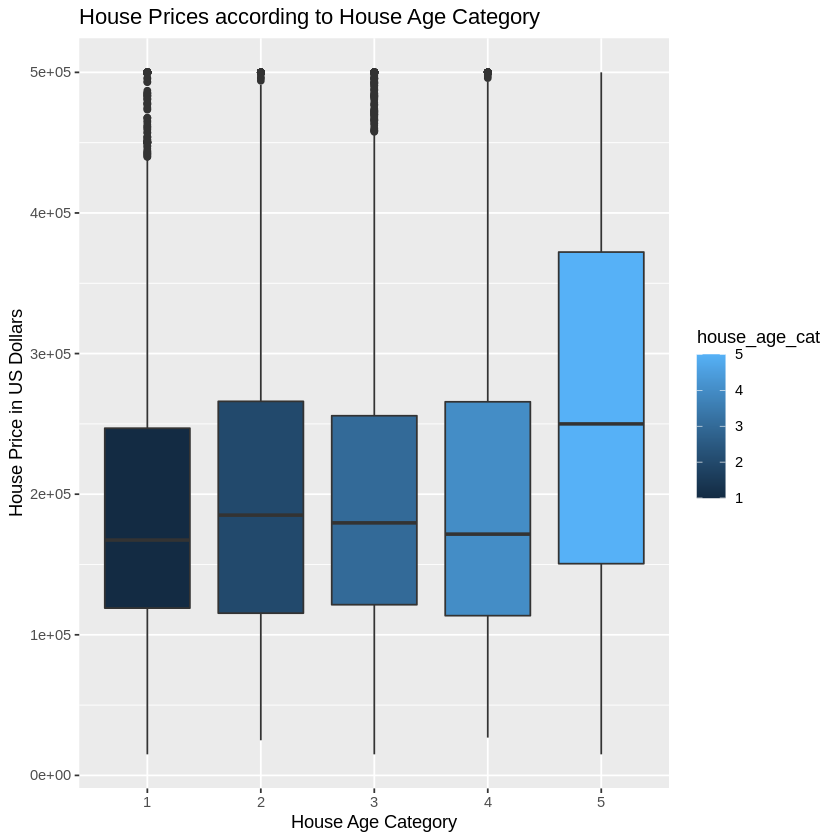

In [22]:
data_housing$house_age_cat <- ifelse(data_housing$housing_median_age>=50, 5, 
                            ifelse(data_housing$housing_median_age>=40,4, 
                            ifelse(data_housing$housing_median_age>=30,3,
                            ifelse(data_housing$housing_median_age>=20,2,
                            1))))


ggplot(data_housing, aes(factor(house_age_cat), median_house_value, fill=house_age_cat)) +
                     geom_boxplot() +
                     ggtitle("House Prices according to House Age Category") +
                     xlab("House Age Category") +
                     ylab("House Price in US Dollars")

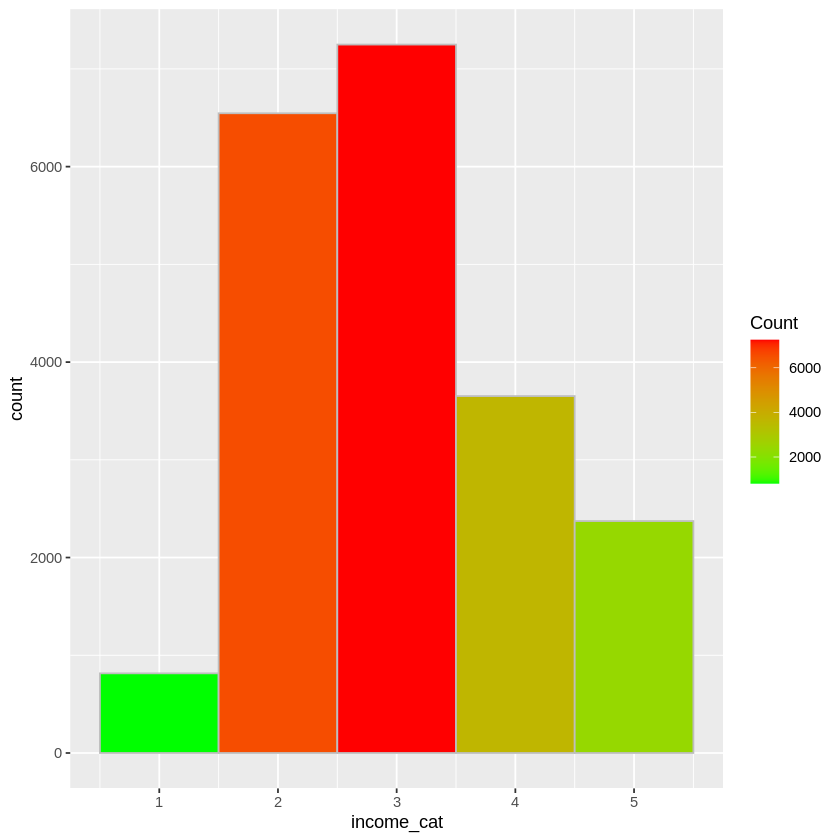

In [23]:
data_housing$income_cat <- ifelse(data_housing$median_income>=6, 5, 
                            ifelse(data_housing$median_income>=4.5,4, 
                            ifelse(data_housing$median_income>=3.0,3,
                            ifelse(data_housing$median_income>=1.5,2,
                            1))))


ggplot(data_housing, aes(x=income_cat, fill = ..count..)) +
    geom_histogram(color="grey", binwidth = 1.0, center=0)+
    scale_fill_gradient("Count", low = "green", high = "red")

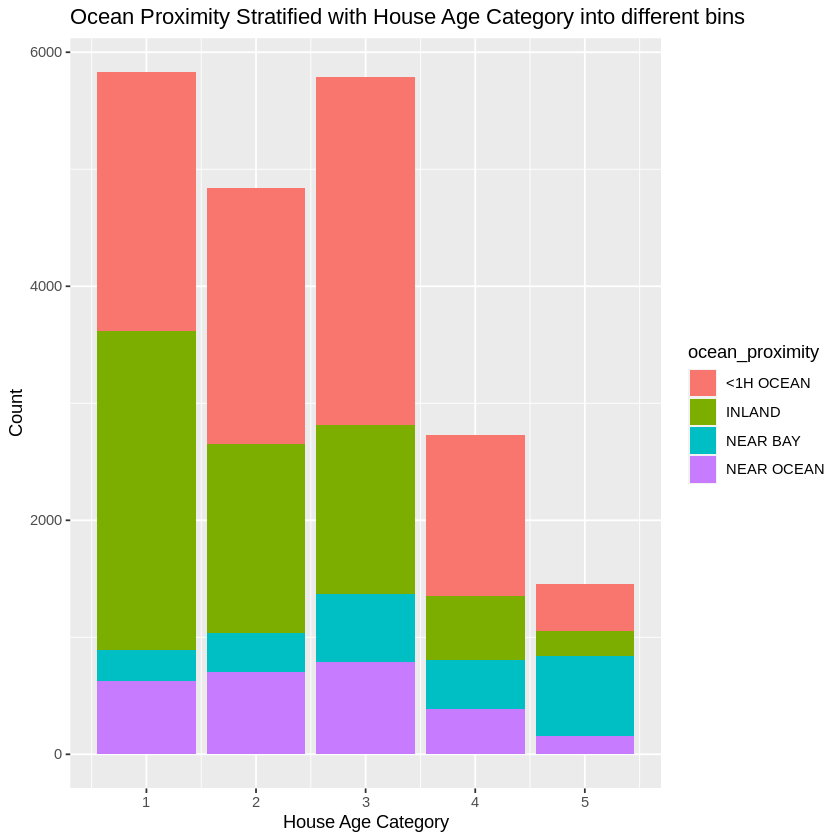

In [24]:
ggplot(data = data_housing) + geom_bar(mapping = aes(x =house_age_cat , fill = ocean_proximity)) + 
                              ggtitle("Ocean Proximity Stratified with House Age Category into different bins") + 
                              xlab("House Age Category") + 
                              ylab("Count")

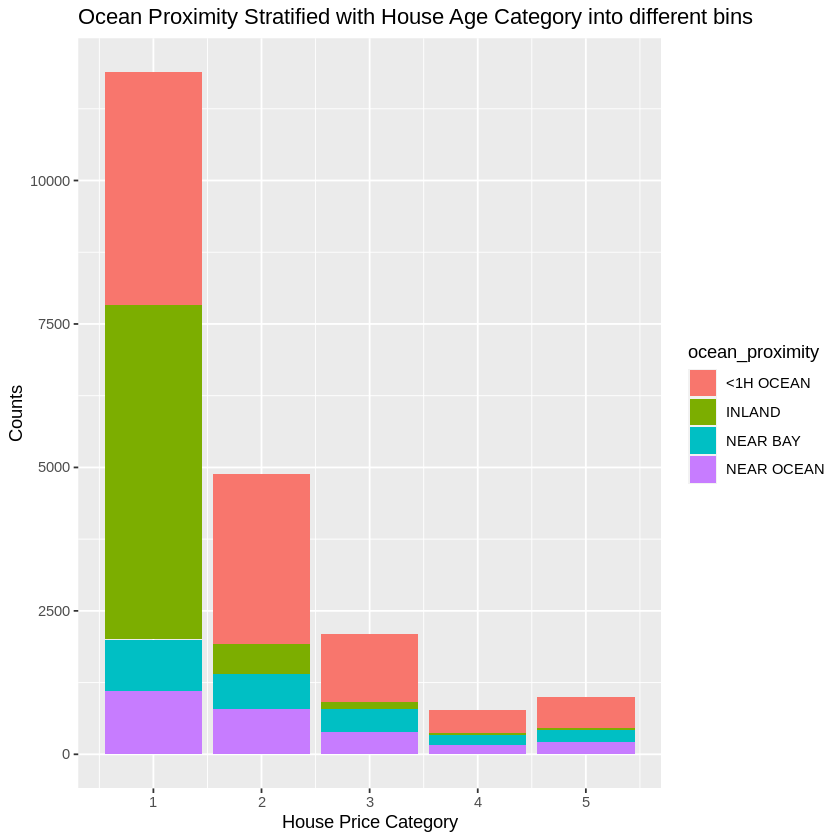

In [25]:
data_housing$house_price_category <- ifelse(data_housing$median_house_value>=500000, 5, 
                            ifelse(data_housing$median_house_value>=400000,4, 
                            ifelse(data_housing$median_house_value>=300000,3,
                            ifelse(data_housing$median_house_value>=200000,2,
                            1))))


ggplot(data = data_housing) + geom_bar(mapping = aes(x =house_price_category , fill = ocean_proximity)) + 
                              ggtitle("Ocean Proximity Stratified with House Age Category into different bins") +
                              xlab("House Price Category") +
                              ylab("Counts")

# Conclusion

## This we have understand  data preprocessing, exploratory analysis, visualization on a dataset using R language.

# --------------------- END OF ASSIGNMENT ---------------------